In [ ]:
!pip install scvi-tools
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 9.4 MB/s 
     |████████████████████████████████| 232 kB 63.8 MB/s 
     |████████████████████████████████| 140 kB 73.8 MB/s 
     |████████████████████████████████| 418 kB 61.1 MB/s 
     |████████████████████████████████| 718 kB 52.0 MB/s 
     |████████████████████████████████| 527 kB 72.6 MB/s 
     |████████████████████████████████| 283 kB 71.3 MB/s 
     |████████████████████████████████| 96 kB 5.6 MB/s 
     |████████████████████████████████| 190 kB 68.0 MB/s 
     |████████████████████████████████| 952 kB 57.2 MB/s 
     |████████████████████████████████| 596 kB 46.1 MB/s 
     |████████████████████████████████| 140 kB 60.0 MB/s 
     |████████████████████████████████| 829 kB 48.1 MB/s 
     |████████████████████████████████| 1.1 MB 40.9 MB/s 
     |████████████████████████████████| 51 kB 6.1 MB/s 
     |██████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.3 MB/s 
     |████████████████████████████████| 11.2 MB 61.6 MB/s 
     |████████████████████████████████| 88 kB 7.2 MB/s 
     |████████████████████████████████| 930 kB 46.0 MB/s 
     |████████████████████████████████| 1.1 MB 49.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=d8766cfef458f5d24236d626b2fec7f5da854923d07414417d6c3fea7e24c411
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=e40c4f170747e29cb3fcddbbd73ac2851204764f8c8ce2fc97af0740da04a03e
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for sessi

In [ ]:
!pip install anndata
import anndata as ad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

from scvi.external import RNAStereoscope, SpatialStereoscope

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

Global seed set to 0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
path = './gdrive/MyDrive/ST_Project/SimulatedData/Cell2Loc/'
Ann = sc.read_h5ad(path + 'all_cells_20200625.h5ad')
annotations = pd.read_csv(path + 'snRNA_annotation_astro_subtypes_refined59_20200823.csv')

spatial_data_path = path + "exp0.h5ad"
Ann_spatial = sc.read_h5ad(spatial_data_path)

In [ ]:
to_be_removed=[]
for cell in Ann.obs_names:
  if annotations["Unnamed: 0"].isin([cell]).sum():
    continue
  else:
    to_be_removed.append(cell)
t=Ann.obs.drop(index for index in to_be_removed) 
Ann= Ann[Ann.obs["barcode"].isin(t["barcode"].to_list())]

In [ ]:
cell_types=['cell_abundances_Inh_3', 'cell_abundances_Ext_Pir', 'cell_abundances_Oligo_2', 'cell_abundances_Astro_HYPO', 'cell_abundances_Ext_L25', 'cell_abundances_Astro_THAL_lat', 'cell_abundances_Ext_L5_1', 'cell_abundances_Ext_L23', 'cell_abundances_Micro', 'cell_abundances_Ext_Thal_1', 'cell_abundances_Ext_Hpc_CA1', 'cell_abundances_Inh_Meis2_3', 'cell_abundances_Inh_4', 'cell_abundances_OPC_1', 'cell_abundances_Oligo_1', 'cell_abundances_Ext_Hpc_CA3', 'cell_abundances_Astro_CTX', 'cell_abundances_Astro_THAL_med', 'cell_abundances_Inh_Vip', 'cell_abundances_Ext_Amy_2', 'cell_abundances_Astro_AMY_CTX', 'cell_abundances_Unk_1', 'cell_abundances_Inh_Sst', 'cell_abundances_Inh_Meis2_2', 'cell_abundances_Ext_Hpc_DG2', 'cell_abundances_Ext_Hpc_DG1', 'cell_abundances_Inh_1', 'cell_abundances_Inh_Meis2_4', 'cell_abundances_Inh_2', 'cell_abundances_Nb_1', 'cell_abundances_Ext_Thal_2', 'cell_abundances_Ext_Amy_1', 'cell_abundances_Ext_L6', 'cell_abundances_OPC_2', 'cell_abundances_Inh_Meis2_1', 'cell_abundances_Ext_L6B', 'cell_abundances_LowQ_2', 'cell_abundances_Ext_Unk_3', 'cell_abundances_Ext_L56', 'cell_abundances_Inh_Lamp5', 'cell_abundances_Inh_Pvalb', 'cell_abundances_Ext_L5_2', 'cell_abundances_Inh_6', 'cell_abundances_Astro_AMY', 'cell_abundances_Ext_ClauPyr', 'cell_abundances_Astro_HPC', 'cell_abundances_Astro_WM', 'cell_abundances_Nb_2', 'cell_abundances_Inh_5']
i=0
for cell in cell_types:
    cell=cell.lstrip("cell_abundances_")
    cell_types[i]=cell
    i=i+1

In [ ]:
og_cell_types=annotations["annotation_1"].unique()
diff=[]
for cell in og_cell_types:
    if cell in cell_types:
        continue;
    else:
        diff.append(cell)

In [ ]:
mta=annotations["annotation_1"].to_numpy()
i=0
to_be_kept=[]
for i in range(len(mta)):
    if mta[i] in diff:
        to_be_kept.append(False)
        continue
    else:
        to_be_kept.append(True)
        

In [ ]:
Ann=Ann[to_be_kept]
Ann

View of AnnData object with n_obs × n_vars = 39651 × 31053
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'sample', 'barcode'
    var: 'feature_types', 'genome', 'SYMBOL', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt'

In [ ]:
Ann_spatial.X.data=np.round(Ann_spatial.X.data,0)

In [ ]:
sc_adata=ad.AnnData(Ann.X)
st_adata=ad.AnnData(Ann_spatial.X)

In [ ]:
sc_adata.layers["counts"] = sc_adata.X.copy()
st_adata.layers["counts"] = st_adata.X.copy()

In [ ]:
mta=mta[to_be_kept]
sc_adata.obs["cell_type"]=mta

In [ ]:
st_adata=ad.AnnData(Ann_spatial.X)
st_adata.layers["counts"] = st_adata.X.copy()

In [ ]:

RNAStereoscope.setup_anndata(sc_adata, layer = "counts", labels_key = "cell_type")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [13:40<00:00,  8.20s/it, loss=8.38e+05, v_num=1]


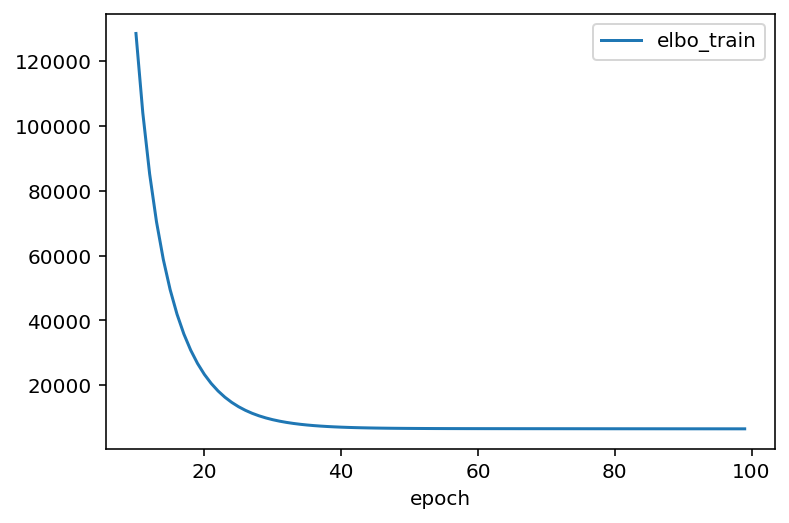

In [ ]:
train = True
if train:
    sc_model = RNAStereoscope(sc_adata)
    sc_model.train(max_epochs = 100)
    sc_model.history["elbo_train"][10:].plot()
    sc_model.save("scmodel", overwrite=True)
else:
    sc_model = RNAStereoscope.load("scmodel", adata=sc_adata)
    print("Loaded RNA model from file!")

In [ ]:
m.to_csv("Ann.csv")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 2000/2000: 100%|██████████| 2000/2000 [18:09<00:00,  1.84it/s, loss=5.51e+07, v_num=1]


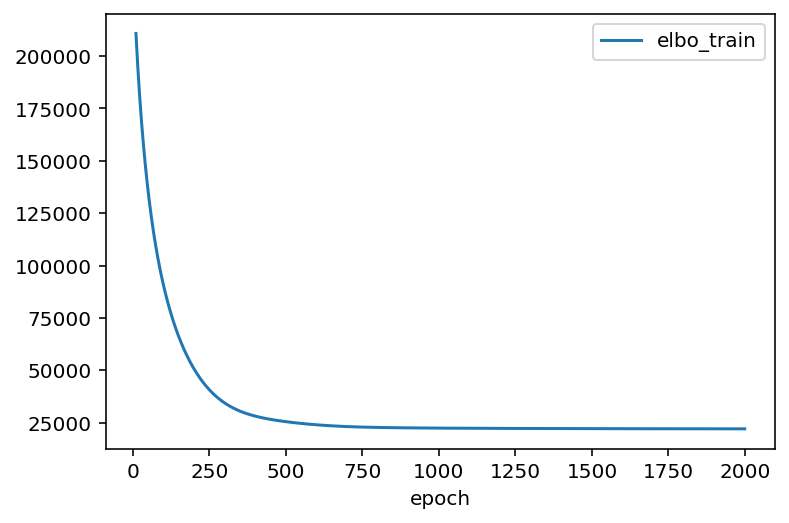

In [ ]:
train=True
if train:
    spatial_model = SpatialStereoscope.from_rna_model(st_adata, sc_model)
    spatial_model.train(max_epochs = 2000)
    spatial_model.history["elbo_train"][10:].plot()
    spatial_model.save("stmodel", overwrite = True)
else:
    spatial_model = SpatialStereoscope.load("stmodel", adata=st_adata)
    print("Loaded Spatial model from file!")


In [ ]:
spatial_model.get_proportions().to_csv("output_exp0.csv")